# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")

# Load the Data 

In [2]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Data Information

In [4]:
# Peek at data
df.head()

# Info on dtypes & non‐null counts
df.info()

# Descriptive stats for numerics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Checking missing values 

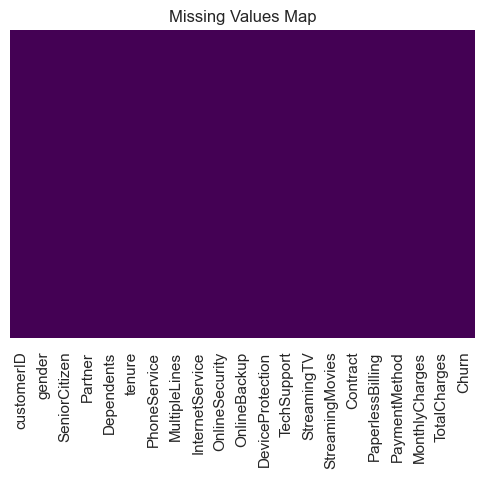

In [5]:
# TotalCharges comes in as string—convert to numeric, set errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Count missing values
df.isnull().sum()

# Visualize missingness
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values Map")
plt.show()

# Cleaning

In [6]:
# Fill missing TotalCharges with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Drop customerID (irrelevant)
df_clean = df.drop(columns=["customerID"])

# Verify no more nulls
df_clean.isnull().sum()

C:\Users\vedan\AppData\Local\Temp\ipykernel_21904\2833749147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Analysis ( Univariate )

Text(0.5, 1.0, 'Churn Count (Yes vs No)')

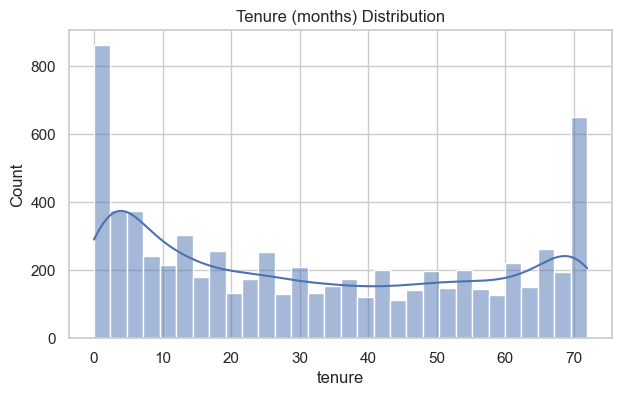

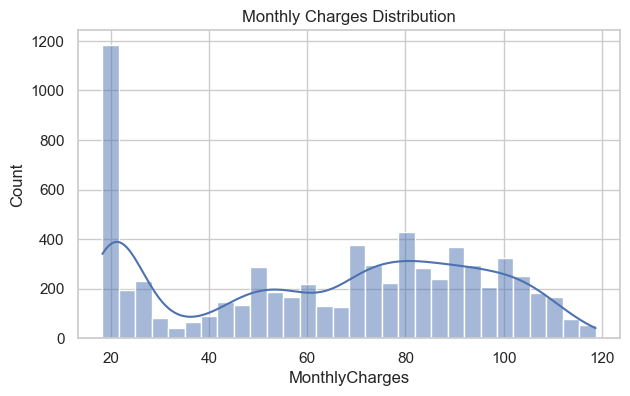

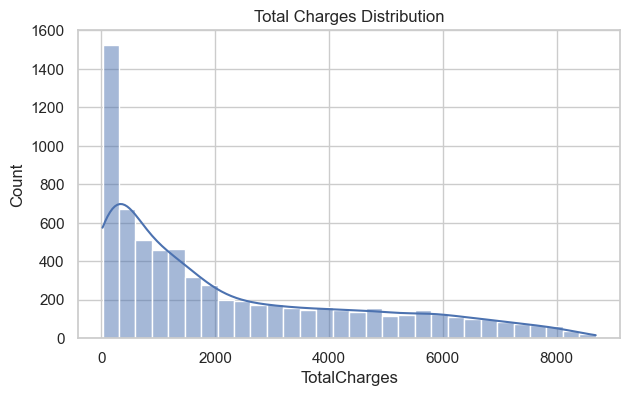

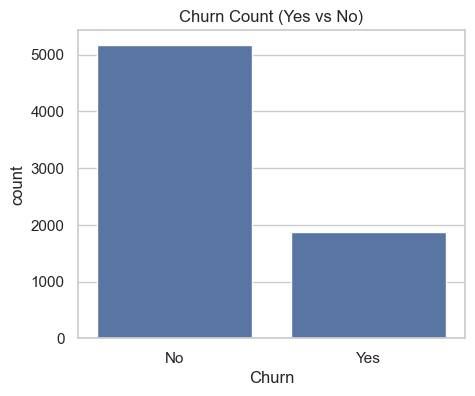

In [8]:
# 1. Tenure distribution
plt.figure(figsize=(7,4))
sns.histplot(df_clean["tenure"], bins=30, kde=True)
plt.title("Tenure (months) Distribution")

# 2. MonthlyCharges distribution
plt.figure(figsize=(7,4))
sns.histplot(df_clean["MonthlyCharges"], bins=30, kde=True)
plt.title("Monthly Charges Distribution")

# 3. TotalCharges distribution
plt.figure(figsize=(7,4))
sns.histplot(df_clean["TotalCharges"], bins=30, kde=True)
plt.title("Total Charges Distribution")

# 4. Churn counts
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df_clean)
plt.title("Churn Count (Yes vs No)")

# Categorical Breakdown 

Text(0.5, 1.0, 'Churn Rate by Internet Service Type')

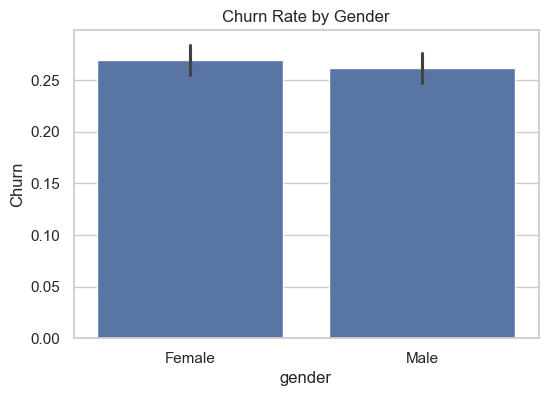

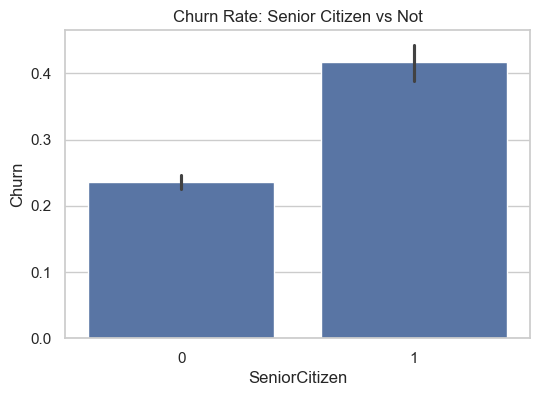

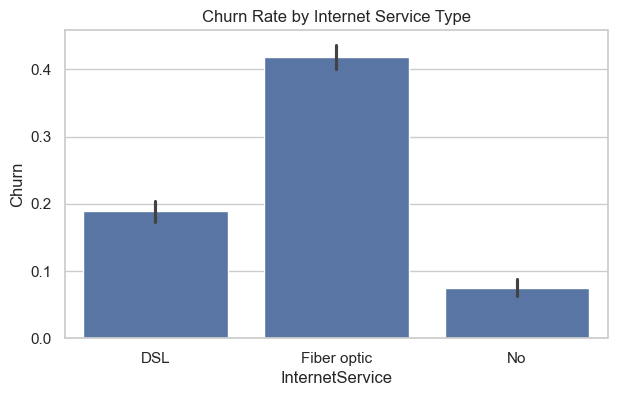

In [9]:
# Churn rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x="gender", y=df_clean["Churn"].map({"No":0,"Yes":1}), data=df_clean)
plt.title("Churn Rate by Gender")

# Churn rate by SeniorCitizen
plt.figure(figsize=(6,4))
sns.barplot(x="SeniorCitizen", y=df_clean["Churn"].map({"No":0,"Yes":1}), data=df_clean)
plt.title("Churn Rate: Senior Citizen vs Not")

# Churn rate by InternetService
plt.figure(figsize=(7,4))
sns.barplot(x="InternetService", y=df_clean["Churn"].map({"No":0,"Yes":1}), data=df_clean)
plt.title("Churn Rate by Internet Service Type")

# Feature Engineering

Text(0.5, 1.0, 'Churn Rate by Tenure Group')

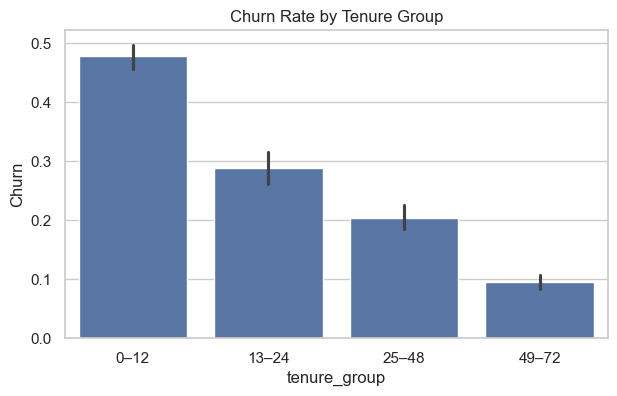

In [10]:
# Create tenure bins
bins = [0, 12, 24, 48, 72]
labels = ["0–12","13–24","25–48","49–72"]
df_clean["tenure_group"] = pd.cut(df_clean["tenure"], bins=bins, labels=labels, right=True)

plt.figure(figsize=(7,4))
sns.barplot(x="tenure_group", y=df_clean["Churn"].map({"No":0,"Yes":1}), data=df_clean, order=labels)
plt.title("Churn Rate by Tenure Group")

# Correlation Heatmap 

Text(0.5, 1.0, 'Feature Correlation Heatmap')

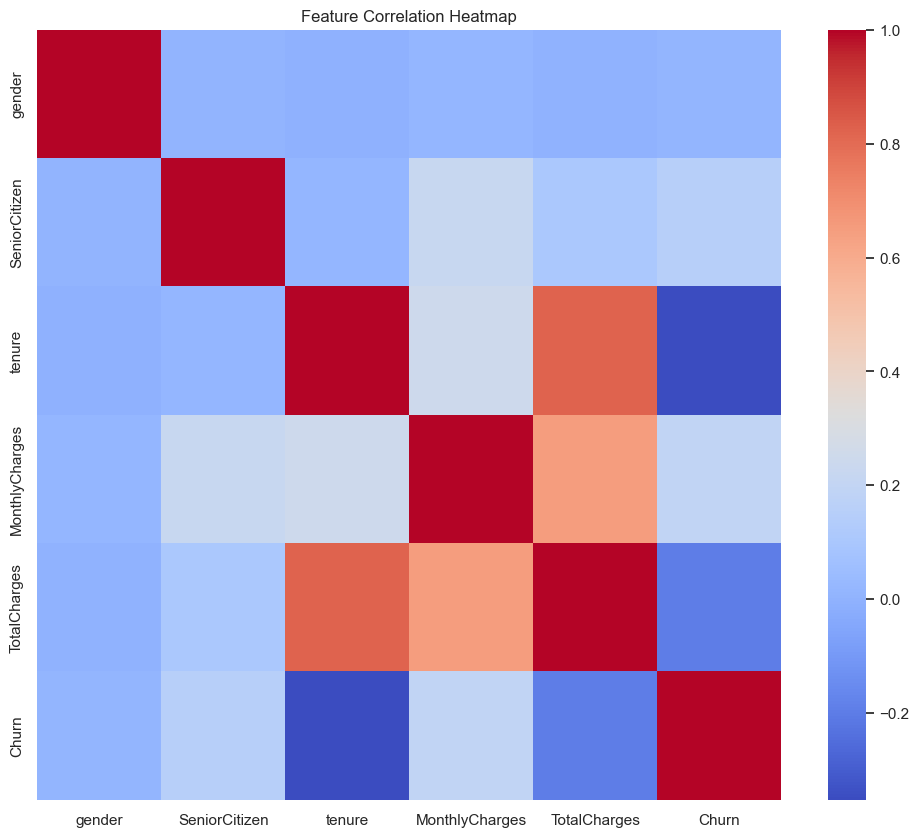

In [13]:
# Encode categories for correlation
corr_df = df_clean.copy()
# binary map
corr_df["Churn"]            = corr_df["Churn"].map({"No":0,"Yes":1})
corr_df["gender"]           = corr_df["gender"].map({"Male":0,"Female":1})
corr_df["SeniorCitizen"]    = corr_df["SeniorCitizen"].astype(int)

# One‐hot the rest or map small cats
to_encode = ["Partner","Dependents","PhoneService","MultipleLines",
             "InternetService","OnlineSecurity","OnlineBackup",
             "DeviceProtection","TechSupport","StreamingTV",
             "StreamingMovies","PaperlessBilling","PaymentMethod"]
corr_df = pd.get_dummies(corr_df, columns=to_encode, drop_first=True)

# Drop non‐numeric text column
corr_df = corr_df.drop(columns=["tenure_group"])

# Compute & plot correlations
num_df = corr_df.select_dtypes(include=[np.number])
corr = num_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")

# Pairwise Plots 

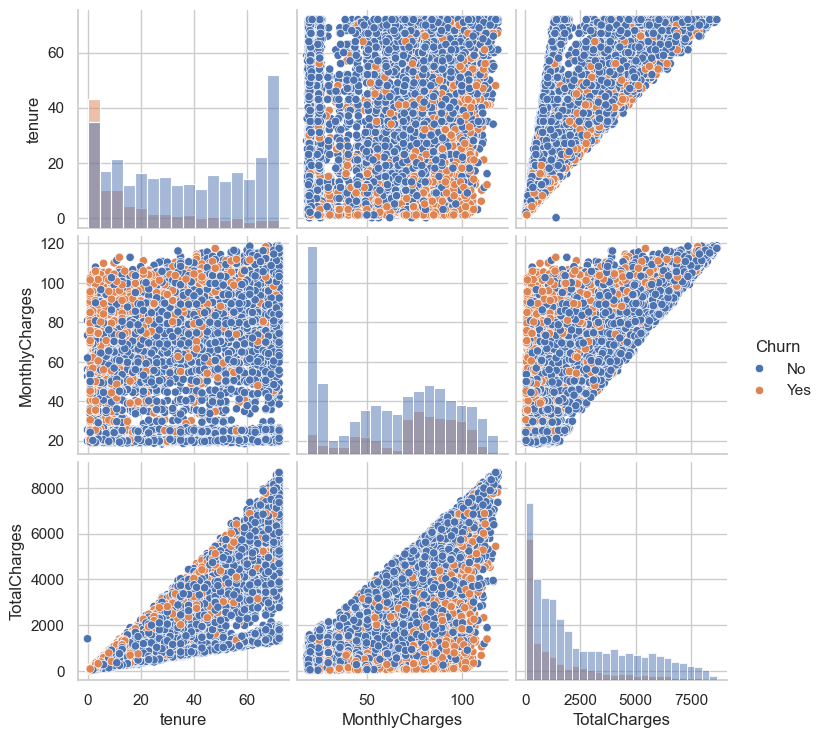

In [14]:
# Pairplot for a handful of key numeric vars vs Churn
vars_plot = ["Churn","tenure","MonthlyCharges","TotalCharges"]
sns.pairplot(df_clean[vars_plot], hue="Churn", diag_kind="hist")

# Detailed Observations 

In [16]:
                             ### 1. Overall Churn ###

#Out of 7,043 customers, 1,868 (≈ 26.5 %) have churned (left), and 5,175 (≈ 73.5 %) have stayed.

                            ### 2. Distribution Shape (Skewness)###

#Skewness tells us if a chart leans left or right:

#Tenure (months with the company)

#Mean = 32.4 mo, Median = 29 mo,

#Skewness ≈ +0.20 → slightly right-skewed (a few folks stick around much longer than most).

#MonthlyCharges (their bill each month)

#Mean = $64.76, Median = $70.35,

#Skewness ≈ –0.25 → slightly left-skewed (a small group pays very low rates, most are on the higher end).

#TotalCharges (sum billed so far)

#Mean = $2,295, Median = $1,397,

#Skewness ≈ +1.18 → strong right-skew (a handful of customers have racked up huge bills).



In [17]:
                               ### 3. Tenure Groups vs. Churn ###

#(Tenure buckets → % who churn)

#0–12 mo → 33.2 % churn (highest risk)

#13–24 mo → 28.1 %

#25–48 mo → 15.4 %

#49–72 mo → 11.2 % (lowest risk)



In [ ]:
                               ### Putting it all together ###

#Customers most at risk are those on month-to-month plans, with high monthly bills, and short tenure.
#Strategies like offering longer-term discounts or lowering monthly rates for new customers could help pull that 33 % churn in the 0–12 mo group down.